In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
complete = pd.read_csv('all_cleaned_data.csv')

In [3]:
sns.set_context(rc={"figure.figsize": (10,6)})
sns.set_style("white")
cp = sns.color_palette("GnBu_r", 10)

###### Films can be "successful" in very different ways.

###### Sci-Fi, Action and Animated films typically dominate with big opening weekend box office takings

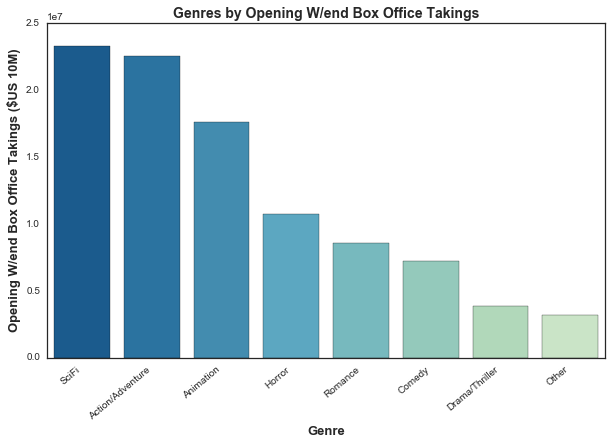

In [4]:
top = complete.groupby('Major_Genre')['w_1_gross'].mean().sort_values(ascending=False)
ax = sns.barplot(top.index, top.values, palette=cp)
plt.xlabel('Genre', fontsize=13, weight='bold')
plt.ylabel('Opening W/end Box Office Takings ($US 10M)', fontsize=13, weight='bold')
ax.set_xticklabels(top.index, rotation=40, ha='right')
plt.title('Genres by Opening W/end Box Office Takings', fontsize=14, weight='bold')
plt.show()

###### However Horror films are very successful relative to their budget

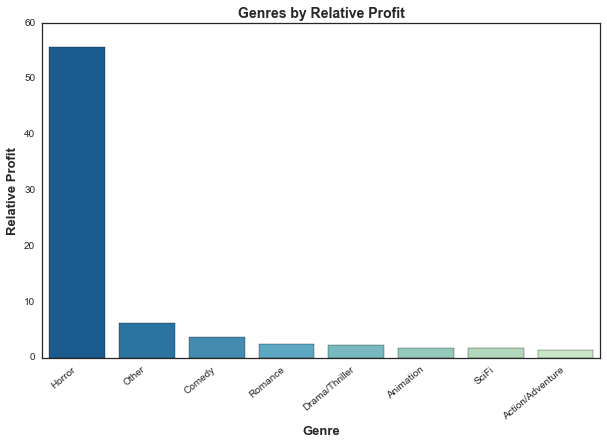

In [5]:
top = complete.groupby('Major_Genre')['rel_profit'].mean().sort_values(ascending=False)
ax = sns.barplot(top.index, top.values, palette=cp)
plt.xlabel('Genre', fontsize=13, weight='bold')
plt.ylabel('Relative Profit', fontsize=13, weight='bold')
ax.set_xticklabels(top.index, rotation=40, ha='right')
plt.title('Genres by Relative Profit', fontsize=14, weight='bold')
plt.show()

##### With an average budget a quarter of the size of that for Action, SciFi and Animated films, it is easier for Horror films to make their money back faster.

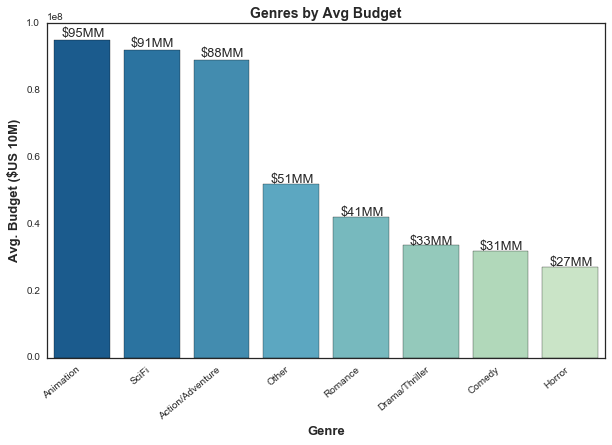

In [6]:
top = complete.groupby('Major_Genre')['adjusted_budget'].mean().sort_values(ascending=False)
ax = sns.barplot(top.index, top.values, palette=cp)
plt.xlabel('Genre', fontsize=13, weight='bold')
plt.ylabel('Avg. Budget ($US 10M)', fontsize=13, weight='bold')
ax.set_xticklabels(top.index, rotation=40, ha='right')
avgs = [x // 1000000 for x in top.values]
for p, a in zip(ax.patches,avgs):
    height = p.get_height()*1.01
    ax.text(p.get_x()+0.1, height, '${:,.0f}MM'.format(a), fontsize=13)
plt.title('Genres by Avg Budget', fontsize=14, weight='bold')
plt.show()

###### Average films budgets, both nominal and adjusted, have increased steadily since the 1908s

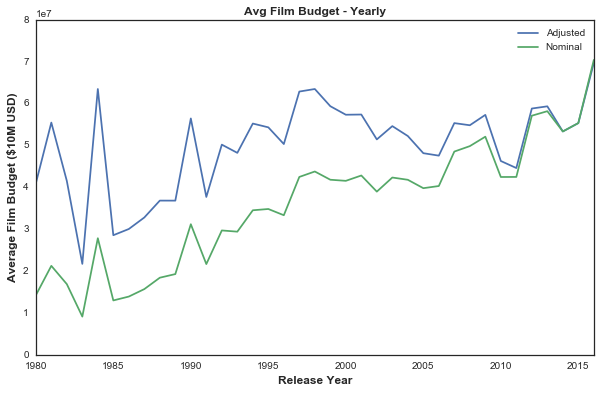

In [7]:
ax = complete[complete['Release_Year']>=1980].groupby('Release_Year')['adjusted_budget'].mean().plot(label="Adjusted")
complete[complete['Release_Year']>=1980].groupby('Release_Year')['budget_val'].mean().plot(label="Nominal")
plt.xlabel('Release Year', fontsize=12, weight='bold')
plt.ylabel('Average Film Budget ($10M USD)', fontsize=12, weight='bold')
plt.title('Avg Film Budget - Yearly', fontsize=12, weight='bold')
plt.legend()
plt.show()

###### At the same time, the average opening weekend takings seem to have been on a slight downward trend since 2000

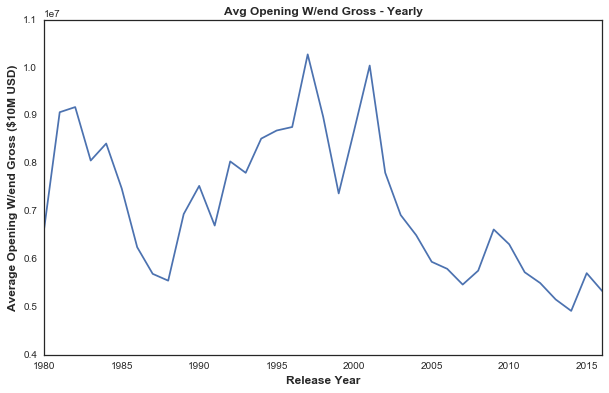

In [8]:
ax = complete[complete['Release_Year']>=1980].groupby('Release_Year')['w_1_gross'].mean().plot()
plt.xlabel('Release Year', fontsize=12, weight='bold')
plt.ylabel('Average Opening W/end Gross ($10M USD)', fontsize=12, weight='bold')
plt.title('Avg Opening W/end Gross - Yearly', fontsize=12, weight='bold')
plt.show()

###### However, the total number of films released has almost doubled since 2000, pushing down the box office average

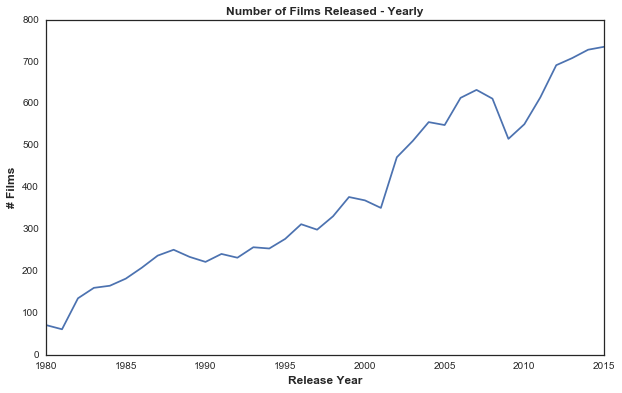

In [9]:
ax = complete[(complete['Release_Year']>=1980) & (complete['Release_Year']<=2015)].groupby('Release_Year')['w_1_gross'].size().plot()
plt.xlabel('Release Year', fontsize=12, weight='bold')
plt.ylabel('# Films', fontsize=12, weight='bold')
plt.title('Number of Films Released - Yearly', fontsize=12, weight='bold')
plt.show()

###### And the vast majority of releases make less than $25 million in their opening weekend

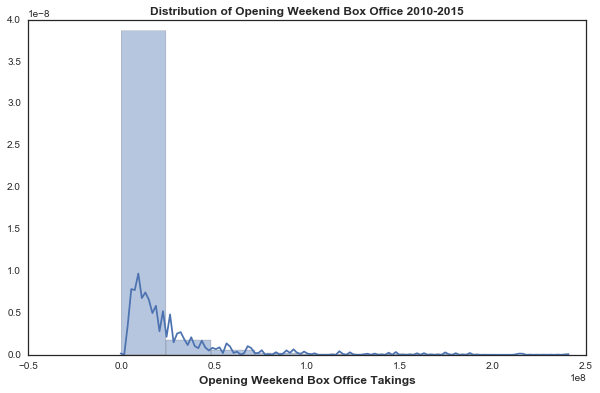

In [10]:
ax = sns.distplot(complete[(complete['Release_Year']>=2010) & (complete['Release_Year']<=2015)]['w_1_gross'].dropna(),bins=10)
plt.xlabel('Opening Weekend Box Office Takings', fontsize=12, weight='bold')
plt.title('Distribution of Opening Weekend Box Office 2010-2015', fontsize=12, weight='bold')
plt.show()

###### Whilst opening weekend box office records continue to be broken on a regular basis

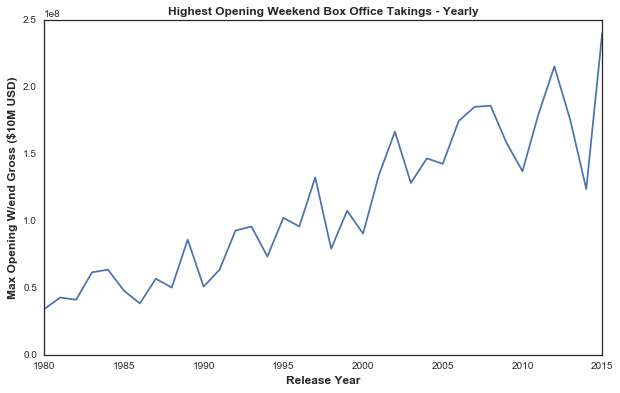

In [11]:
ax = complete[(complete['Release_Year']>=1980) & (complete['Release_Year']<=2015)].groupby('Release_Year')['w_1_gross'].max().plot()
plt.xlabel('Release Year', fontsize=12, weight='bold')
plt.ylabel('Max Opening W/end Gross ($10M USD)', fontsize=12, weight='bold')
plt.title('Highest Opening Weekend Box Office Takings - Yearly', fontsize=12, weight='bold')
plt.show()

###### Most films drop by abour 40% in Box Office takings between their opening and second weekends

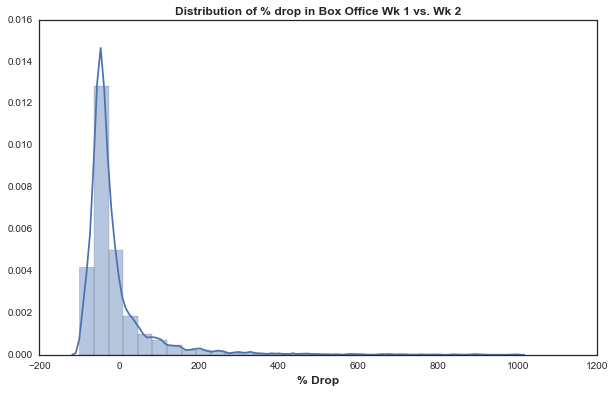

In [12]:
ax = sns.distplot(complete['w2_$_change'].dropna(),bins=30)
plt.xlabel('% Drop', fontsize=12, weight='bold')
plt.title('Distribution of % drop in Box Office Wk 1 vs. Wk 2', fontsize=12, weight='bold')
plt.show()

###### There are films that actually increase their box office takings in their second weekend, and these are typically from more obscure genres

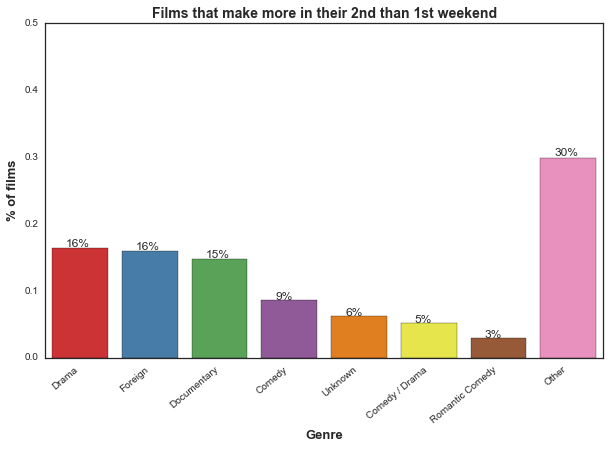

In [13]:
c = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf']
top = complete[complete['w2_$_change'] > 0].groupby('Genre').size().sort_values(ascending=False)/len(complete[complete['w2_$_change'] > 0])
names = list(top.index)[0:7]
values = list(top.values)[0:7]
names.append('Other')
values.append(1-sum(values))
ax = sns.barplot(names,values, palette=c)
plt.xlabel('Genre', fontsize=13, weight='bold')
plt.ylabel('% of films', fontsize=13, weight='bold')
ax.set_xticklabels(names, rotation=40, ha='right')
ax.set_ylim(0,0.5)
for p, a in zip(ax.patches,values):
    height = p.get_height()*1.01
    ax.text(p.get_x()+0.2, height, '{:,.0f}%'.format(a*100), fontsize=12)
plt.title('Films that make more in their 2nd than 1st weekend', fontsize=14, weight='bold')
plt.show()

###### Interestingly, the success of these 2nd wekend 'growth' movies pushes the 1st week change positive in December

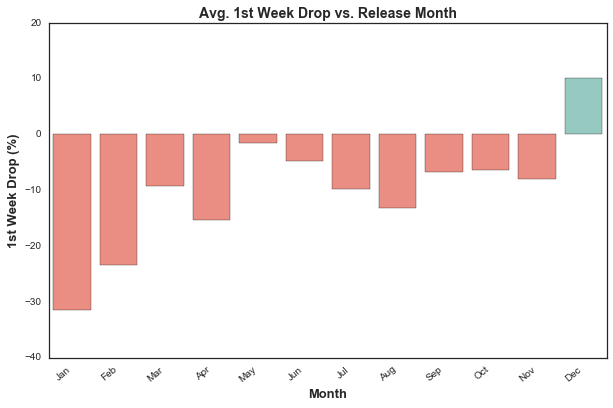

In [14]:
c = ['#fb8072','#fb8072','#fb8072','#fb8072','#fb8072','#fb8072','#fb8072','#fb8072','#fb8072','#fb8072','#fb8072','#8dd3c7']
months = complete.groupby('Release_Month')['w2_$_change'].mean().sort_index()
ax = sns.barplot(months.index, months.values, palette=c)
plt.xlabel('Month', fontsize=13, weight='bold')
plt.ylabel('1st Week Drop (%)', fontsize=13, weight='bold')
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(month_names, rotation=40, ha='right')
plt.title('Avg. 1st Week Drop vs. Release Month', fontsize=14, weight='bold')
plt.show()

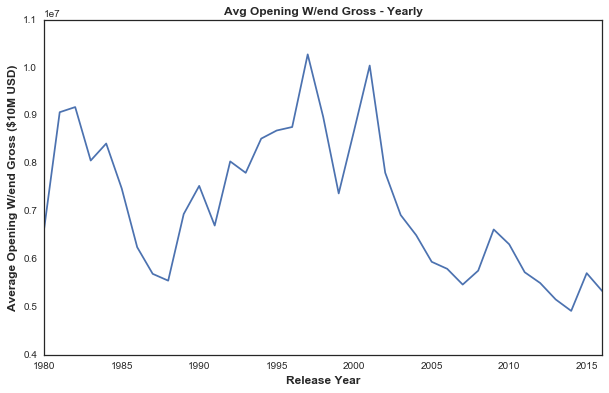

In [15]:
ax = complete[complete['Release_Year']>=1980].groupby('Release_Year')['w_1_gross'].mean().plot()
plt.xlabel('Release Year', fontsize=12, weight='bold')
plt.ylabel('Average Opening W/end Gross ($10M USD)', fontsize=12, weight='bold')
plt.title('Avg Opening W/end Gross - Yearly', fontsize=12, weight='bold')
plt.show()

### Batman vs Superman

In [16]:
bvs = complete[complete.movieID == "id=superman2015.htm"] # Batman vs. Suprman
cw = complete[complete.movieID == "id=marvel2016.htm"] # Civil War
dk = complete[complete.movieID == "id=batman3.htm"] #Batman: Dark Knight Rises

In [17]:
#Comparison group = SciFi, Action/Adventure films, with budget > 100 million & released since 2010
comparison = complete[(complete['adjusted_budget'] >= 100000000) & (complete['Release_Year'] >= 2010)
                     & ((complete['Major_Genre'] == 'Action/Adventure') | (complete['Major_Genre'] == 'SciFi'))]
print("No. of comparative films: {}".format(len(comparison)))

No. of comparative films: 89


##### Batman vs. Superman performed very well on its opening weekend

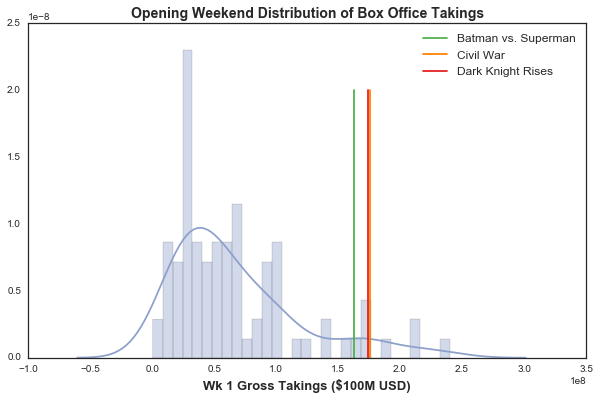

In [18]:
ax = sns.distplot(comparison['w_1_gross'].dropna(), color="#8da0cb",bins=30)
plt.xlabel('Wk 1 Gross Takings ($100M USD)', fontsize=13, weight='bold')
plt.title('Opening Weekend Distribution of Box Office Takings', fontsize=14, weight='bold')
plt.axvline(bvs.iloc[0]['w_1_gross'], color='#4daf4a', ymax=0.8, label="Batman vs. Superman")
plt.axvline(cw.iloc[0]['w_1_gross'], color='#ff7f00', ymax=0.8, label="Civil War")
plt.axvline(dk.iloc[0]['w_1_gross'], color='#e41a1c', ymax=0.8, label="Dark Knight Rises")
plt.legend(fontsize=12)
plt.show()

###### And was in the top 10 films with highest opening weekend (vs. this comparison group)

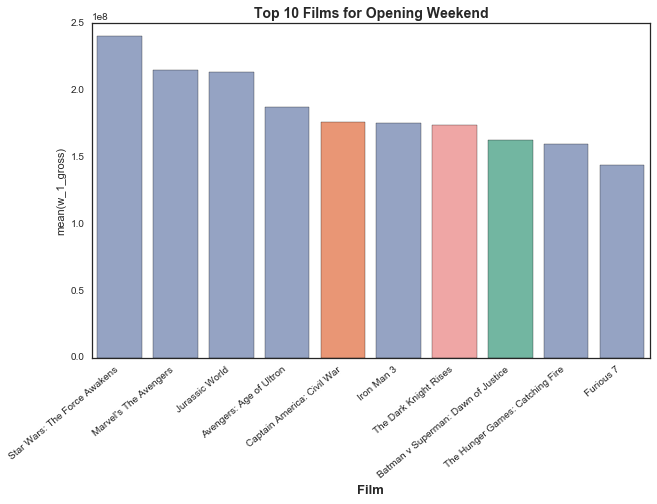

In [19]:
top10 = comparison.sort_values(by='w_1_gross', ascending=False).head(10)[['name','w_1_gross']]
colors = ["#8da0cb","#8da0cb","#8da0cb","#8da0cb","#fc8d62","#8da0cb","#fb9a99","#66c2a5","#8da0cb","#8da0cb"]
ax = sns.barplot(top10['name'], top10['w_1_gross'], palette=colors)
plt.xlabel('Film', fontsize=13, weight='bold')
ax.set_xticklabels(top10['name'], rotation=40, ha='right')
plt.title('Top 10 Films for Opening Weekend', fontsize=14, weight='bold')
plt.show()

###### However it did a lot worse than its peers by the 2nd weekend, dropping nearly 70% vs. an average drop of 50% for similar films

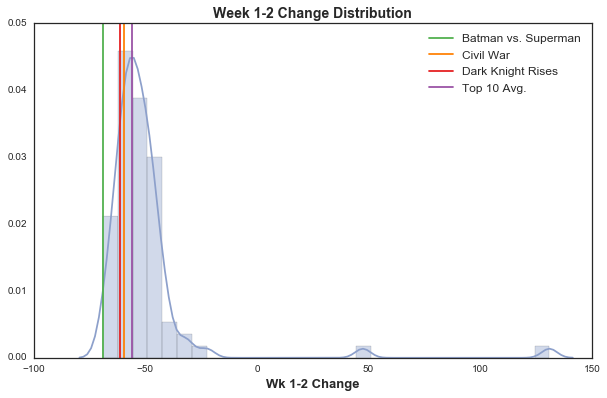

In [20]:
ax = sns.distplot(comparison['w2_$_change'].dropna(), color="#8da0cb",bins=30)
plt.xlabel('Wk 1-2 Change', fontsize=13, weight='bold')
plt.title('Week 1-2 Change Distribution', fontsize=14, weight='bold')
plt.axvline(bvs.iloc[0]['w2_$_change'], color='#4daf4a', ymax=1, label="Batman vs. Superman")
plt.axvline(cw.iloc[0]['w2_$_change'], color='#ff7f00', ymax=1, label="Civil War")
plt.axvline(dk.iloc[0]['w2_$_change'], color='#e41a1c', ymax=1, label="Dark Knight Rises")
plt.axvline(comparison.sort_values(by='w_1_gross', ascending=False).head(10)['w2_$_change'].mean(), color='#984ea3',
           ymax=1, label="Top 10 Avg.")
plt.legend(fontsize=12)
plt.show()

In [21]:
'''Possible scenarios for week 2 performance
What would Batman vs. Superman have looked like if the drop was same as:
1. Average of the top 10
2. Average of all comparison group
2. Average of films released in same month
3. Avengers: Civil War
4. Batman: Dark Knight Rises '''

scenarios = ['Actual','Top 10 Films','All Films','Same Month','Civil War','Dark Knight Rises']
additional = []
actual = bvs.iloc[0]['w_2_gross']
additional.append(0)

# Using average drop of top 10
new = bvs.iloc[0]['w_1_gross'] * (1 + comparison.sort_values(by='w_1_gross', ascending=False).head(10)['w2_$_change'].mean()/100)
additional.append(new-actual)

# Using average drop of all flms
new = bvs.iloc[0]['w_1_gross'] * (1 + comparison.sort_values(by='w_1_gross', ascending=False)['w2_$_change'].mean()/100)
additional.append(new-actual)

# Using average drop of films released in same month
new = bvs.iloc[0]['w_1_gross'] * (1 + comparison[comparison['Release_Month'] == bvs.iloc[0]['Release_Month']].sort_values(by='w_1_gross', ascending=False)['w2_$_change'].mean()/100)
additional.append(new-actual)

# Using civil war
new = bvs.iloc[0]['w_1_gross'] * (1 + cw['w2_$_change'].mean()/100)
additional.append(new-actual)

# Using Dark Knight Rises
new = bvs.iloc[0]['w_1_gross'] * (1 + dk['w2_$_change'].mean()/100)
additional.append(new-actual)

###### We find that Batman vs. Superman could have made an additional $12-30 million in its second weekend had it performed similar to comparative films

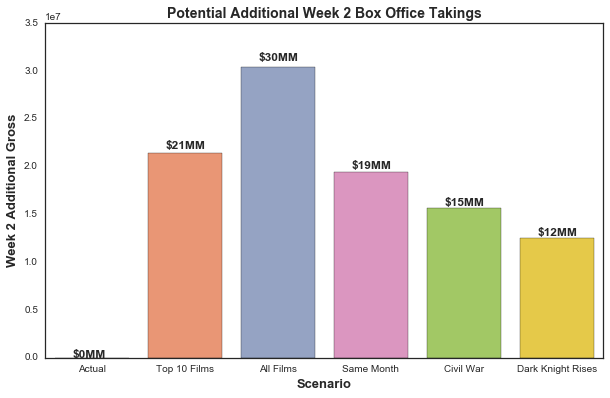

In [22]:
c=['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
ax = sns.barplot(scenarios,additional,palette=c)
plt.xlabel('Scenario', fontsize=13, weight='bold')
plt.ylabel('Week 2 Additional Gross', fontsize=13, weight='bold')
plt.title('Potential Additional Week 2 Box Office Takings', fontsize=14, weight='bold')
values = [x // 1000000 for x in additional]
for p,v,c in zip(ax.patches,values,c):
    height = p.get_height()*1.02
    ax.text(p.get_x()+0.2, height, '${:,.0f}MM'.format(v), fontsize=12, weight='bold')
plt.show()